In [1]:
"""Importing Neccesary Libraries"""
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as PP

mpl.style.use('seaborn-poster')

In [2]:
def calculated_height(p, T, R_d = 287, g = 9.8):
    """ Provided a standard atmosphere starting at sea level, this function computes an array of heights in between layers of the atmosphere.
    
        input:
        ------
        
            P = an array of pressure [Pa]
            
            T = an array for Temperature [K]
            
            R_d = gas constant for dry air [J/kg/K]
            
            g = gravity [m/s^2]
            
           
            
    
    
        output:
        -------
        
            delta_Z = scalar value of an incrimental height array between "layers" of regional climate model.
    """
    current_z = 0 # assume we are starting at the surface
    
    height_list = [current_z] # initialize a list for the heights, inserting the initial height
    
    for k in range(len(p)-1):
        # calculate the height to the next layer
        delta_Z = (-R_d*T[k]/g)*(np.log(p[k+1])-np.log(p[k]))
       
        # add this to the previous height
        current_z += delta_Z
        
        # insert this into the list
        height_list.append(current_z)
    
    # convert the height list to a numpy array
    height_array = np.array(height_list)
    
    return height_array 

In [3]:
"""Testing Function"""
k = 0
R_d = 287
g = 9.80
p = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100, 0])*100
T = np.array([50, 40, 30, 20, 15, 10, 8, 6, 4, 2, 0])+273.15
h = np.linspace(0, 15000, 1000)
gamma = -10/1000 
ts = 15 + 273.15 
ps = 1000 * 100 

t_z = ts + (gamma*h)

p_of_z = ps * ( (ts + gamma*h) / (ts))**(-g/(R_d * gamma))

height_array = calculated_height(p_of_z, t_z, R_d, g)  

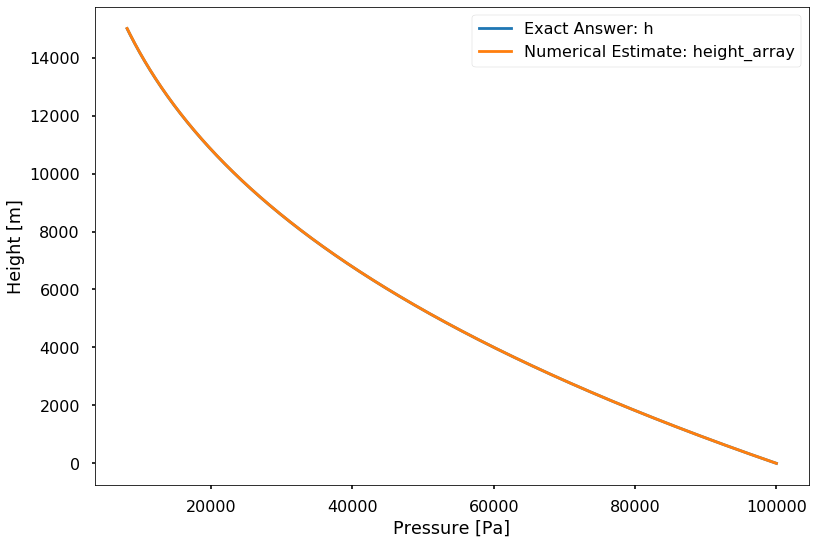

In [4]:
# create the figure (fig) and the subplot (ax)
fig, ax = PP.subplots()

# plot both versions of height
ax.plot(p_of_z, h, label = "Exact Answer: h")
ax.plot(p_of_z, height_array, label = "Numerical Estimate: height_array")
ax.set_xlabel('Pressure [Pa]')
ax.set_ylabel('Height [m]')
ax.legend(loc = 'best') # add a legend
PP.show()

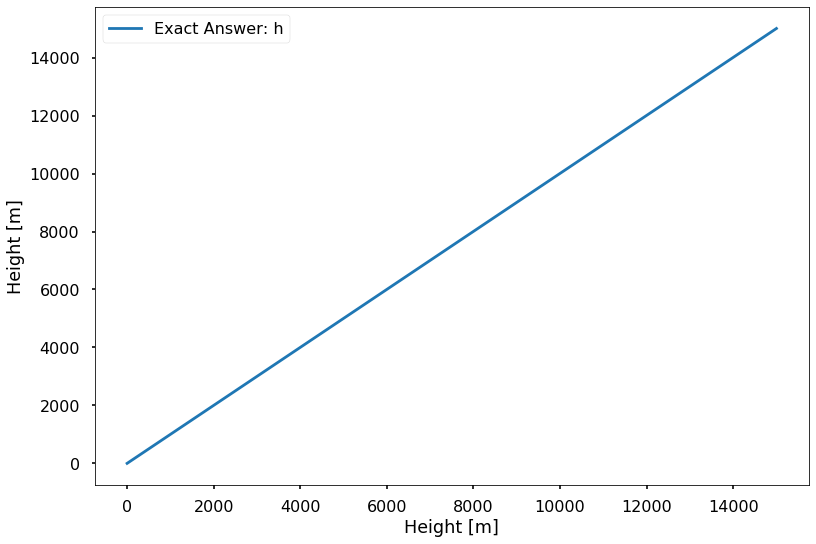

In [5]:
# create the figure (fig) and the subplot (ax)
fig, ax = PP.subplots()

# plot both versions of height
ax.plot(h, height_array, label = "Exact Answer: h")
#ax.plot(h, height_array, label = "Numerical Estimate: height_array")
ax.set_xlabel('Height [m]')
ax.set_ylabel('Height [m]')
ax.legend(loc = 'best') # add a legend
PP.show()

Cells 18 and 19 graphically prove that the calculated height_array function works appropriatly. Cell 18 shows the exponential relationship between pressure and height while Cell 19 shows that Height increases appropriatly. 